/tmp/ipykernel_99094/2937201547.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


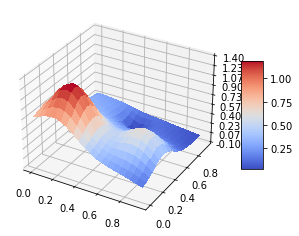

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display
import pandas as pd
from scipy.stats import norm
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [32]:
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

In [39]:
n_samples = 100

maxdegree = 5


np.random.seed(1)
x0 = np.random.rand(n_samples)
np.random.seed(2)
y0 = np.random.rand(n_samples)

x,y = np.meshgrid(x0,y0)

In [40]:
def Normalize(data,mean,std,Ncol):
    for i in range(Ncol):
        if(std[i]==0):
             data[:,i]=(data[:,i]-mean[i])
        if(std[i]>0):
            data[:,i]=(data[:,i]-mean[i])/std[i]
    return data

In [41]:
def SVD(A):
    #Here we are using the function np.linalg.svd to find the unitary transformation U and the diagonal elements 
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    #D is the diagonal matrix
    D = np.zeros((len(U),len(VT)))
    D = np.diag(s)
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))

In [42]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

In [43]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

(10000,)
(10000, 21)
Train data:
0.20971480694110375
-1.4032074301337896
Test data:
0.2123190225304031
-1.4972593443958986


/tmp/ipykernel_99094/3359346691.py:41: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


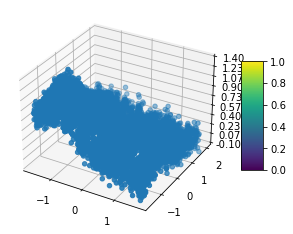

In [45]:
X = create_X(x,y,maxdegree)

noise = 0.1*np.random.randn(X.shape[0])
z = FrankeFunction(X[:,1],X[:,2]) + noise
#First we will find the mean and STD of each column
mean=np.mean(X, axis=0)
std=np.std(X, axis=0)

#Then we will redefine our designe matrix
#First we obtain the number of columns of the matrix
df=pd.DataFrame(X)
col=len(df.columns)

#Then we have found the desigen matrix and our output data Z.
X=Normalize(X,mean,std,col)


#Ofcourse we could have done df = df - df.mean(). THis will subtract the value of the mean and we can divide by the STD
#Then we have scalled our desigen matrix by subtracting the mean value and dividing by std of each column.
#Then we can split our data as follow:

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)
#Then we can define the OLS regression method as follow:
#Our desigen matrix is singular then we must use the SVD method to avoide such a problem or we can simply use np.linalg.pinv function

OLSbeta=np.linalg.pinv(X_train.T @ X_train)@ X_train.T @ z_train
#The we have found the optimized parameter Beta, then let's do our predication 

z_Yeild=X_train @ OLSbeta
z_Predic= X_test @ OLSbeta
#Then we have defined z_OLS based on our model that why we used X_Test
#Then let's find the MSE and R^2
print("Train data:")
print(MSE(z_train,z_Yeild))
print(R2(z_train,z_Yeild))
print("Test data:")
print(MSE(z_test,z_Predic))
print(R2(z_test,z_Predic))

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.scatter3D(X[:,1],X[:,2], z, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [9]:
def bootstrap(data, datapoints):
    t = np.zeros(datapoints)
    n = len(data)
    # non-parametric bootstrap         
    for i in range(datapoints):
        t[i] = np.mean(data[np.random.randint(0,n,n)])
    # analysis    
    print("Bootstrap Statistics :")
    print("original           bias      std. error")
    print("%8g %8g %14g %15g" % (np.mean(data), np.std(data),np.mean(t),np.std(t)))
    return t

In [16]:
t=bootstrap(X_train,100)

Bootstrap Statistics :
original           bias      std. error
-0.000715476 0.971198    4.91289e-05      0.00880574


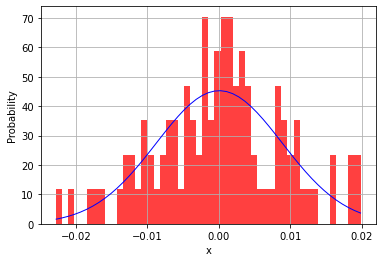

In [17]:
# the histogram of the bootstrapped data (normalized data if density = True)
n, binsboot, patches = plt.hist(t, 50, density=True, facecolor='red', alpha=0.75)
# add a 'best fit' line  
y = norm.pdf(binsboot, np.mean(t), np.std(t))
lt = plt.plot(binsboot, y, 'b', linewidth=1)
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In [60]:
#This a try to understand our model much better:
n_boostraps = 10
degree=21
model=LinearRegression()
# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
z_pred = np.empty((z_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    X_, z_ = resample(X_train, z_train)

    # Evaluate the new model on the same test data each time.
    z_pred[:, i] = model.fit(X_, z_).predict(X_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
z_t= np.empty((z_test.shape[0], n_boostraps))
error = np.mean( np.mean((z_t - z_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(z_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

Error: 0.27910999004204984
Bias^2: 0.16235659014904705
Var: 4.0685643718256414e-05
0.27910999004204984 >= 0.16235659014904705 + 4.0685643718256414e-05 = 0.1623972757927653


Degree of polynomial:   1
Mean squared error on training data: 0.21000639
Mean squared error on test data: 0.21145423
Degree of polynomial:   2
Mean squared error on training data: 0.21002075
Mean squared error on test data: 0.21142946
Degree of polynomial:   3
Mean squared error on training data: 0.21002426
Mean squared error on test data: 0.21143422
Degree of polynomial:   4
Mean squared error on training data: 0.21017121
Mean squared error on test data: 0.21108181
Degree of polynomial:   5
Mean squared error on training data: 0.21008050
Mean squared error on test data: 0.21131861
Degree of polynomial:   6
Mean squared error on training data: 0.21010231
Mean squared error on test data: 0.21126756
Degree of polynomial:   7
Mean squared error on training data: 0.21021387
Mean squared error on test data: 0.21096176
Degree of polynomial:   8
Mean squared error on training data: 0.21003716
Mean squared error on test data: 0.21138334
Degree of polynomial:   9
Mean squared error on training

/tmp/ipykernel_99094/1732743806.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
/tmp/ipykernel_99094/1732743806.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(polynomial, np.log10(testerror), label='Test Error')


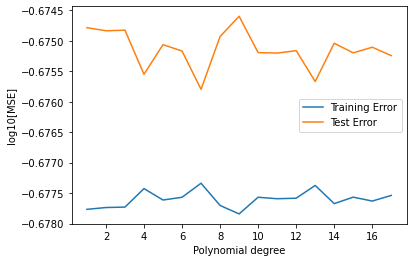

In [49]:
Maxpolydegree = 18
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
trials = 100
for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    for samples in range(trials):
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3)
        beta=np.linalg.pinv(X_train.T @ X_train)@X_train.T @z_train
        zpred=X_train@beta
        ztilde=X_test@beta
        #model = LinearRegression(fit_intercept=False).fit(X_train, z_train)
        #zpred = model.predict(X_train)
        #ztilde = model.predict(X_test)
        testerror[polydegree] += mean_squared_error(z_test, ztilde)
        trainingerror[polydegree] += mean_squared_error(z_train, zpred) 

    testerror[polydegree] /= trials
    trainingerror[polydegree] /= trials
    print("Degree of polynomial: %3d"% polynomial[polydegree])
    print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
    print("Mean squared error on test data: %.8f" % testerror[polydegree])

plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
plt.plot(polynomial, np.log10(testerror), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()
